<a href="https://www.kaggle.com/code/utkarshx27/influence-of-bmi-on-ios-on-children?scriptVersionId=129960537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/impact-of-bmi-on-ios-measures/BMI_IOS_SCD_Asthma.csv
/kaggle/input/impact-of-bmi-on-ios-measures/BMI_IOS_SCD_Asthma.xlsx


In [2]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: holoviews
    Found existing installation: holoviews 1.15.4
    Uninstalling holoviews-1.15.4:
      Successfully uninstalled holoviews-1.15.4


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
from autoviz.classify_method import data_cleaning_suggestions
%matplotlib inline
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
from scipy.stats import ttest_ind

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Imported v0.1.604. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


# Data Overview

In [4]:
df = pd.read_csv("/kaggle/input/impact-of-bmi-on-ios-measures/BMI_IOS_SCD_Asthma.csv")
df.head()

Group  Subject ID  Observation_number Hydroxyurea Asthma  ICS LABA  Gender  \
0  C-SCD           1                   1         Yes    Yes  Yes   No    Male   
1  C-SCD           1                   2         Yes    Yes  Yes   No    Male   
2  C-SCD           1                   3         Yes    Yes  Yes  Yes    Male   
3  C-SCD           1                   4         Yes    Yes  Yes  Yes    Male   
4  C-SCD           2                   1          No     No   No   No  Female   

   Age (months)  Height (cm)  Weight (Kg)    BMI  R5Hz_PP  R20Hz_PP  X5Hz_PP  \
0           239        164.1         61.5  22.84      145       133   -456.0   
1           193        162.7         62.3  23.53      103        98    111.0   
2           212        163.5         63.1  23.60      107        98    174.0   
3           224        163.8         63.7  23.74       87        87   -303.0   
4           204        154.5         66.4  27.82      124       121     98.0   

   Fres_PP  
0      NaN  
1    169.0  
2    159.0  
3      NaN  
4    135.0

# Shape

In [5]:
df.shape

(219, 16)

# Data Preprocessing

In [6]:
df['Fres_PP'].fillna(df['Fres_PP'].mean(), inplace=True)

# Detecting Outliers

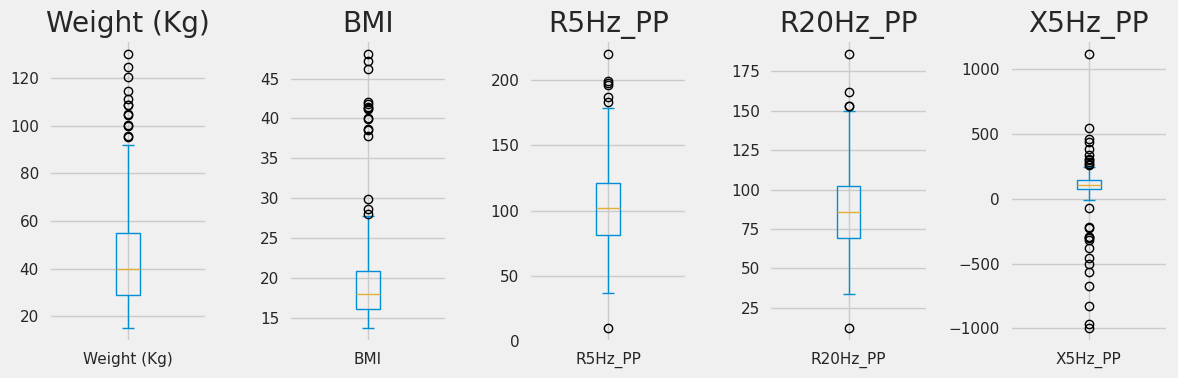

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))
columns = ['Weight (Kg)', 'BMI', 'R5Hz_PP', 'R20Hz_PP', 'X5Hz_PP']
for i, column in enumerate(columns):
    df.plot(kind='box', column=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

# Frequency distribution of categorical variables and numericals variables summary

In [8]:
numerical_vars = ['Age (months)', 'Height (cm)', 'Weight (Kg)', 'BMI', 'R5Hz_PP', 'R20Hz_PP', 'X5Hz_PP', 'Fres_PP']
summary_stats = df[numerical_vars].describe()
print(summary_stats)

categorical_vars = ['Gender', 'Asthma', 'Hydroxyurea', 'ICS', 'LABA']
for var in categorical_vars:
    freq_dist = df[var].value_counts()
    print(f"\n{var}:\n{freq_dist}")

       Age (months)  Height (cm)  Weight (Kg)         BMI     R5Hz_PP  \
count    219.000000   219.000000   219.000000  219.000000  219.000000   
mean     145.000000   146.963014    45.210502   19.881096  104.077626   
std       45.997607    18.851967    22.437625    6.395650   32.201322   
min       50.000000   101.800000    14.900000   13.700000   10.000000   
25%      105.000000   132.100000    28.850000   16.120000   81.500000   
50%      141.000000   148.500000    39.800000   18.000000  102.000000   
75%      184.500000   162.000000    55.100000   20.845000  121.000000   
max      239.000000   185.000000   130.100000   48.070000  220.000000   

         R20Hz_PP      X5Hz_PP     Fres_PP  
count  219.000000   219.000000  219.000000  
mean    87.328767    87.898128  132.326829  
std     25.342998   195.085927   32.413123  
min     12.000000 -1000.000000   61.000000  
25%     69.000000    75.000000  106.000000  
50%     86.000000   104.000000  131.000000  
75%    102.000000   145.000

# Vizualization Numerical Values

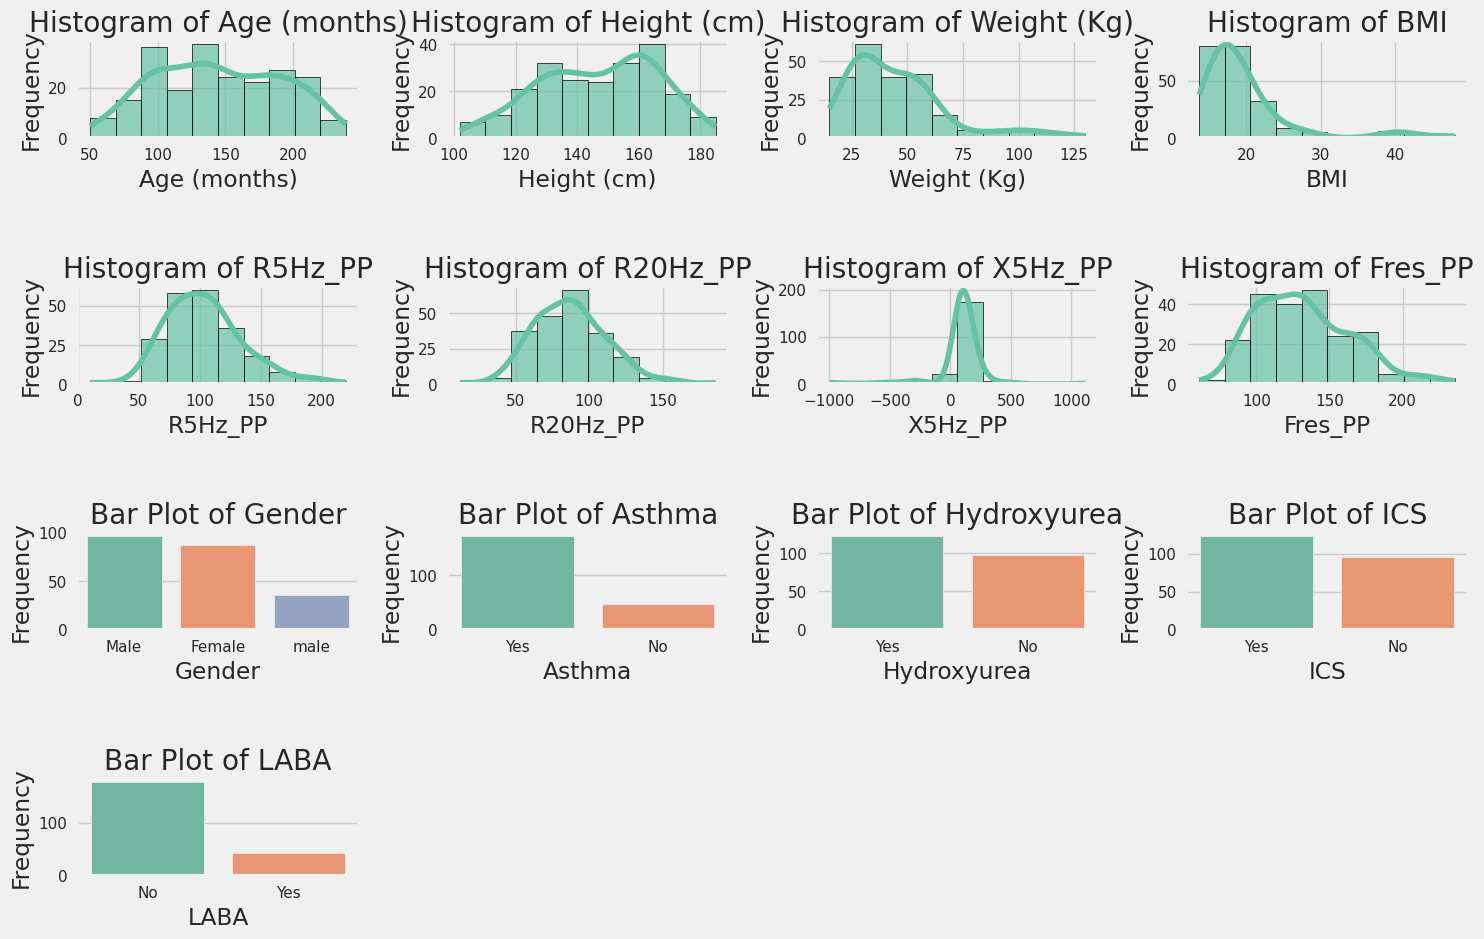

In [9]:
sns.set_palette("Set2")
plt.figure(figsize=(15, 14))
numerical_vars = ['Age (months)', 'Height (cm)', 'Weight (Kg)', 'BMI', 'R5Hz_PP', 'R20Hz_PP', 'X5Hz_PP', 'Fres_PP']
for i, var in enumerate(numerical_vars):
    plt.subplot(6, 4, i+1)
    sns.histplot(df[var], bins=10, kde=True, edgecolor='black', alpha=0.7)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var}')
    plt.tight_layout()
categorical_vars = ['Gender', 'Asthma', 'Hydroxyurea', 'ICS', 'LABA']
for i, var in enumerate(categorical_vars):
    plt.subplot(6, 4, len(numerical_vars) + i + 1)
    value_counts = df[var].value_counts().reset_index()
    sns.barplot(x='index', y=var, data=value_counts)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Bar Plot of {var}')
    plt.tight_layout()
plt.subplots_adjust(hspace=1.5)
plt.show()

# Explore relationships b/w variables

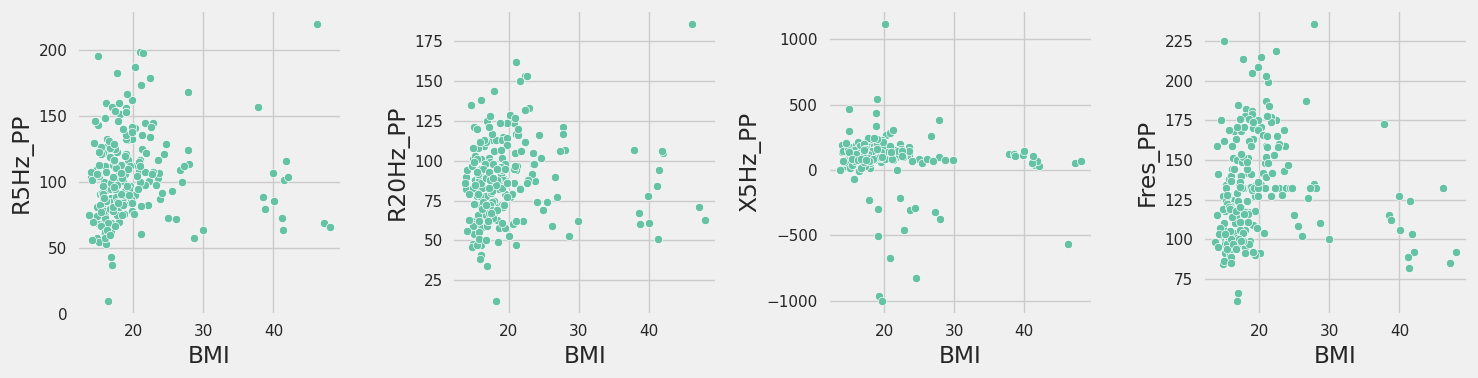

In [10]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.scatterplot(data=df, x='BMI', y='R5Hz_PP')
plt.xlabel('BMI')
plt.ylabel('R5Hz_PP')

plt.subplot(1, 4, 2)
sns.scatterplot(data=df, x='BMI', y='R20Hz_PP')
plt.xlabel('BMI')
plt.ylabel('R20Hz_PP')

plt.subplot(1, 4, 3)
sns.scatterplot(data=df, x='BMI', y='X5Hz_PP')
plt.xlabel('BMI')
plt.ylabel('X5Hz_PP')

plt.subplot(1, 4, 4)
sns.scatterplot(data=df, x='BMI', y='Fres_PP')
plt.xlabel('BMI')
plt.ylabel('Fres_PP')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

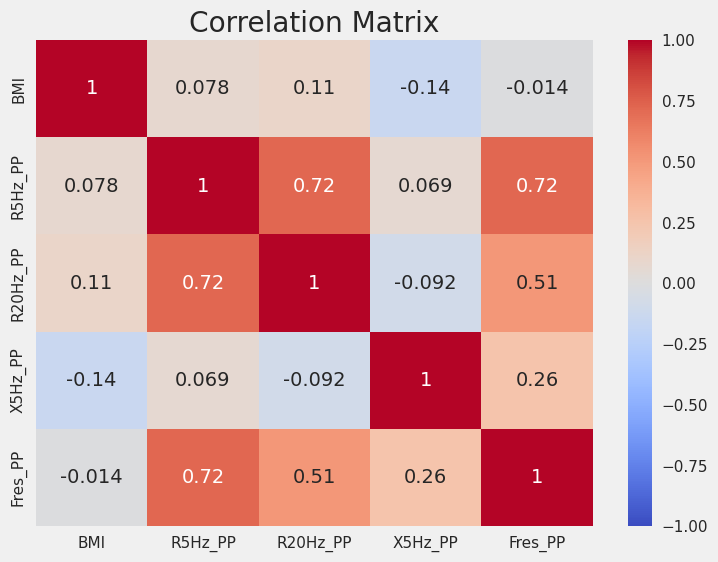

In [11]:
correlation_matrix = df[['BMI', 'R5Hz_PP', 'R20Hz_PP', 'X5Hz_PP', 'Fres_PP']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

#  Comparing the C-SCD and C-Asthma groups

T-Test Results:
Age: t-value = 1.76, p-value = 0.0799
BMI: t-value = -4.82, p-value = 0.0000


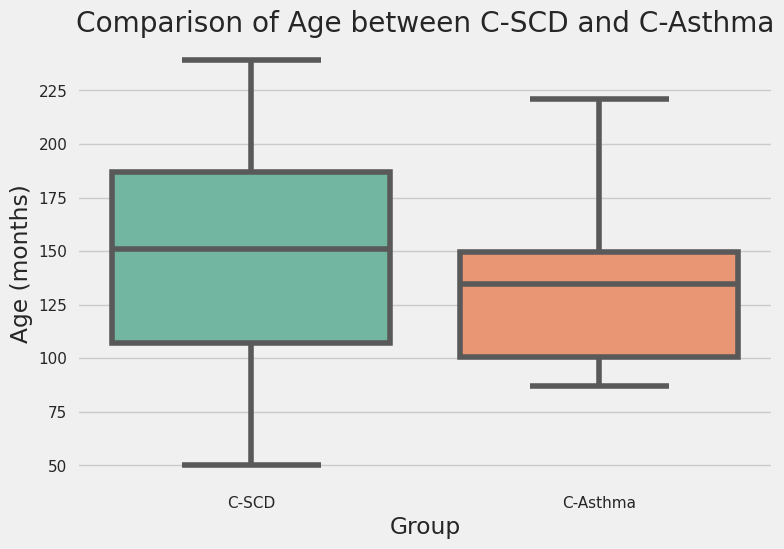

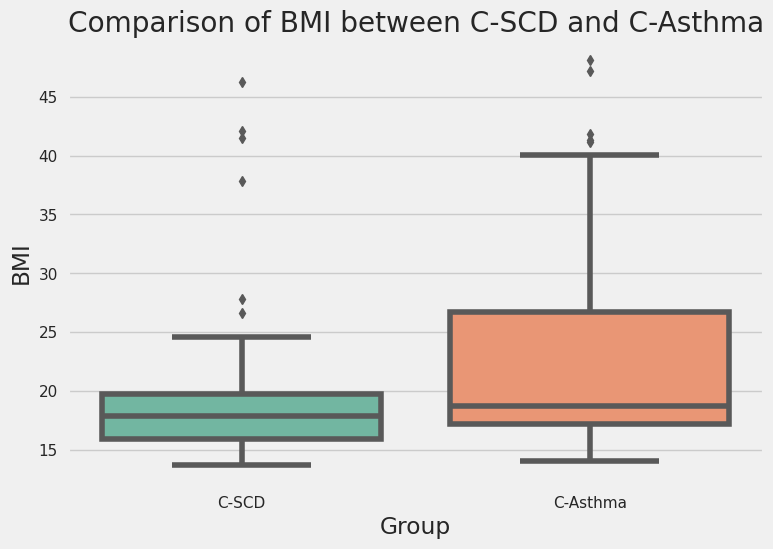

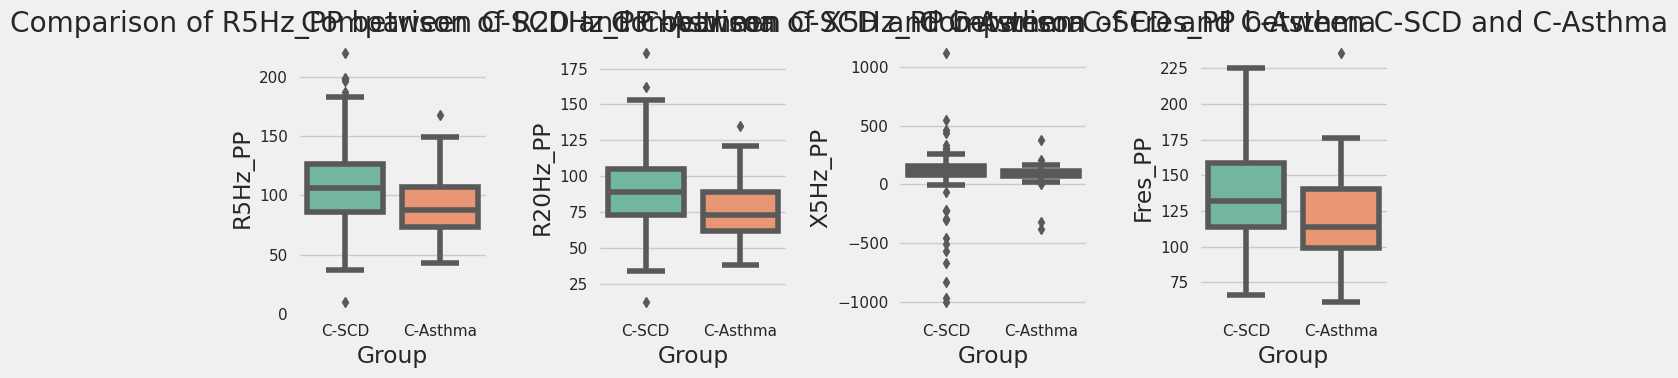

In [12]:
group_scd = df[df['Group'] == 'C-SCD']
group_asthma = df[df['Group'] == 'C-Asthma']
plt.figure()
sns.boxplot(x='Group', y='Age (months)', data=df)
plt.xlabel('Group')
plt.ylabel('Age (months)')
plt.title('Comparison of Age between C-SCD and C-Asthma')
plt.figure()
sns.boxplot(x='Group', y='BMI', data=df)
plt.xlabel('Group')
plt.ylabel('BMI')
plt.title('Comparison of BMI between C-SCD and C-Asthma')

ios_vars = ['R5Hz_PP', 'R20Hz_PP', 'X5Hz_PP', 'Fres_PP']
plt.figure(figsize=(12, 4))
for i, var in enumerate(ios_vars):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x='Group', y=var, data=df)
    plt.xlabel('Group')
    plt.ylabel(var)
    plt.title(f'Comparison of {var} between C-SCD and C-Asthma')
plt.tight_layout() 

age_ttest = ttest_ind(group_scd['Age (months)'], group_asthma['Age (months)'])
bmi_ttest = ttest_ind(group_scd['BMI'], group_asthma['BMI'])


print('T-Test Results:')
print(f'Age: t-value = {age_ttest.statistic:.2f}, p-value = {age_ttest.pvalue:.4f}')
print(f'BMI: t-value = {bmi_ttest.statistic:.2f}, p-value = {bmi_ttest.pvalue:.4f}')

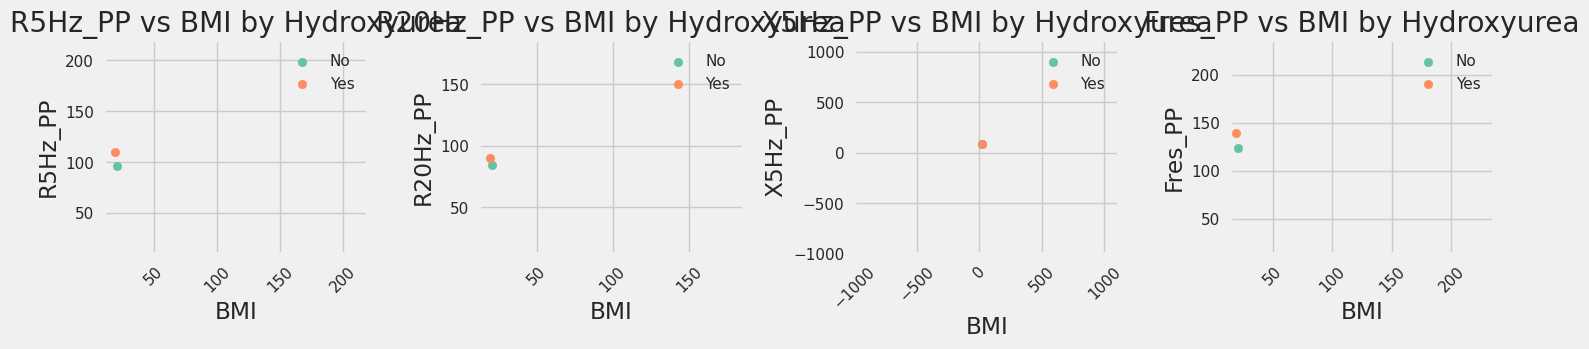

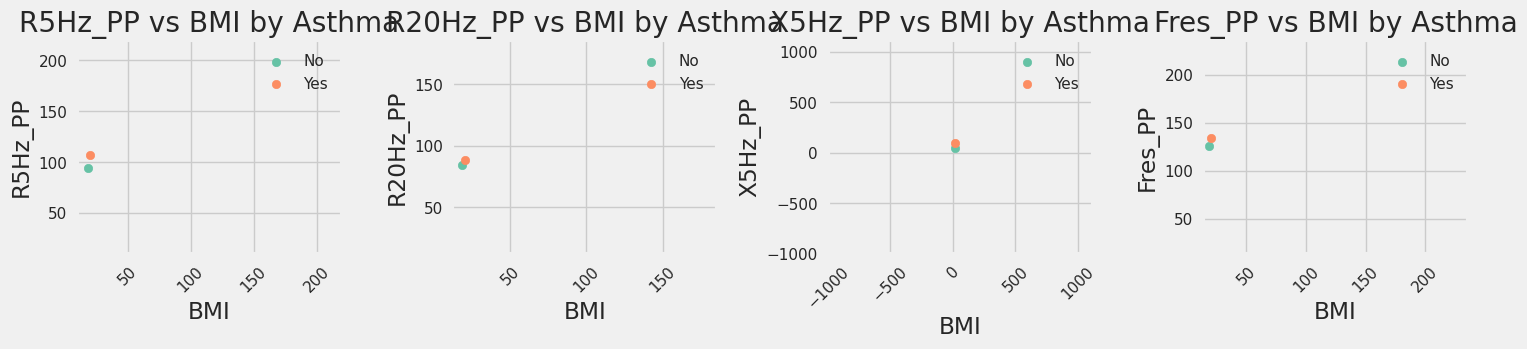

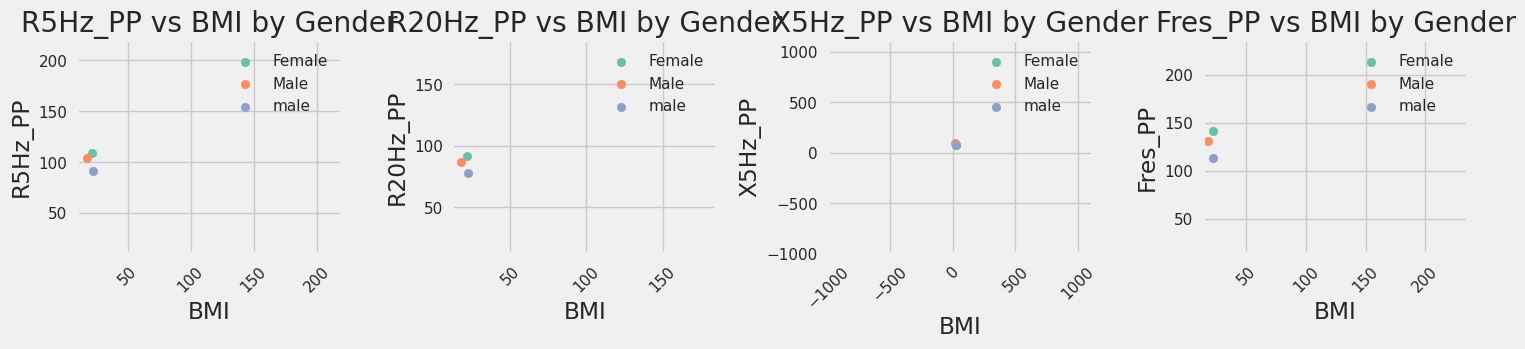

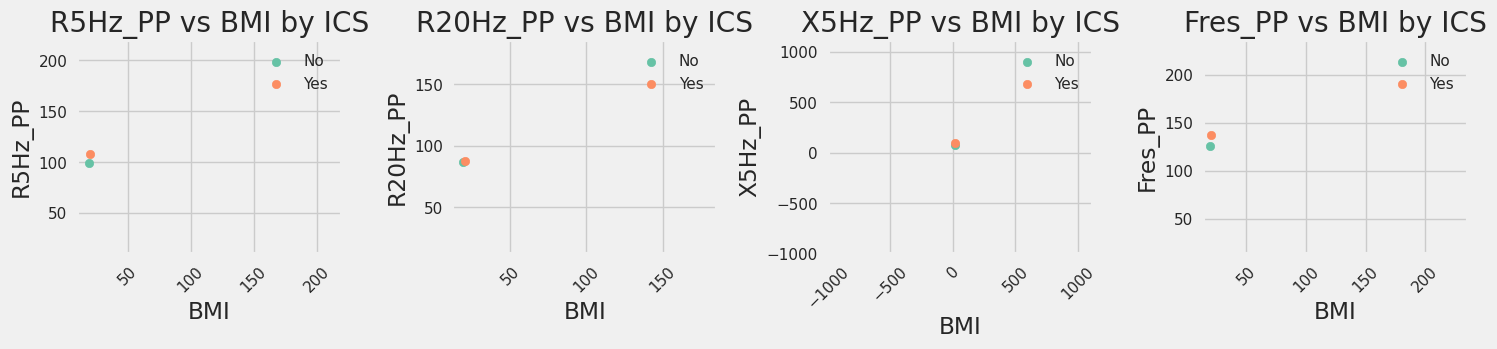

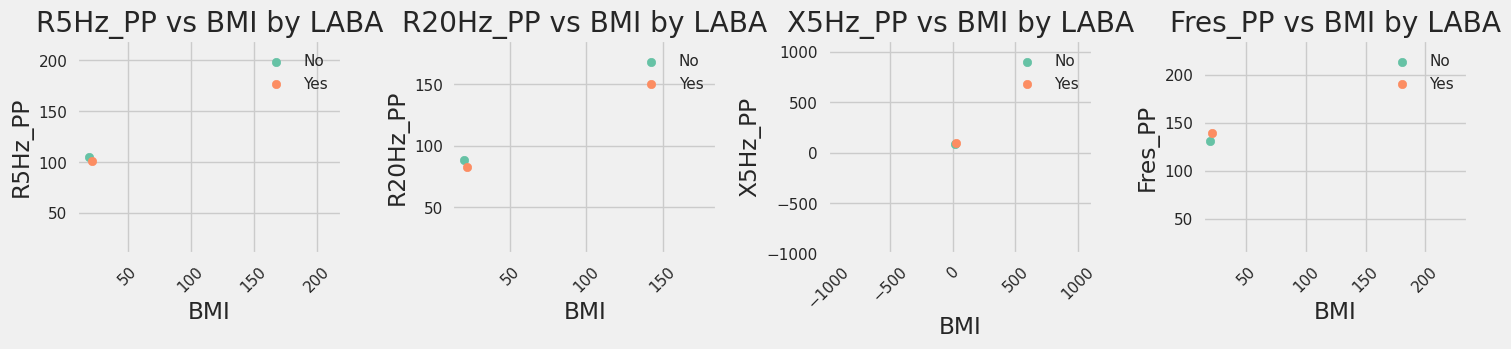

Correlation between BMI and IOS measures by subgroup:
Hydroxyurea  Asthma  Gender  ICS  LABA          
No           No      Female  No   No    R5Hz_PP     0.547403
                                        X5Hz_PP    -0.197047
                                        BMI         1.000000
                     Male    No   No    R20Hz_PP    0.402092
                                        Fres_PP     0.985859
             Yes     Female  No   No    R5Hz_PP    -0.812609
                                        X5Hz_PP    -0.435443
                                        BMI         1.000000
                             Yes  No    R20Hz_PP   -0.283842
                                        Fres_PP    -0.028822
                                  Yes   R5Hz_PP     0.503517
                                        X5Hz_PP    -0.227533
                                        BMI         1.000000
                     Male    No   No    R20Hz_PP    0.885311
                                        Fre

In [13]:
subgroups = ['Hydroxyurea', 'Asthma', 'Gender', 'ICS', 'LABA']

for factor in subgroups:
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))
    
    for i, ios_measure in enumerate(ios_vars):
        ax = axes[i]
        
        grouped_data = df.groupby(factor)[[ios_measure, 'BMI']].mean()
        
        
        for group, data in grouped_data.iterrows():
            ax.scatter(data['BMI'], data[ios_measure], label=group)
        
        ax.set_xlabel('BMI')
        ax.set_ylabel(ios_measure)
        ax.set_title(f'{ios_measure} vs BMI by {factor}')
        ax.legend()
        
        x_min = min(df['BMI'])
        x_max = max(df['BMI'])
        y_min = min(df[ios_measure])
        y_max = max(df[ios_measure])
        axis_min = min(x_min, y_min)
        axis_max = max(x_max, y_max)
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()  
    plt.subplots_adjust(top=0.8)
    plt.show()

correlations = df.groupby(subgroups)[ios_vars + ['BMI']].corr().iloc[0::2, -1]

print('Correlation between BMI and IOS measures by subgroup:')
print(correlations)

# Thank you. Will update notebook with statistical modeling